In [61]:
from keras.datasets import reuters
from keras.utils.np_utils import to_categorical
from keras import models, layers
import numpy as np
import matplotlib.pyplot as plt

In [4]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

2121728/2110848 [==============================] - 1s 0us/step


In [5]:
print(len(train_data), len(test_data))

(8982, 2246)


In [7]:
word_index = reuters.get_word_index()

565248/550378 [==============================] - 0s 0us/step


In [28]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i-3,'?') for i in train_data[0]])

In [39]:
def vectorize_sequences(sequences, dimension=10000): 
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences): 
        results[i, sequence] = 1
    return results 

In [40]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [54]:
one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [57]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [58]:
model.compile(optimizer='rmsprop', 
             loss='categorical_crossentropy', 
             metrics=['accuracy'])

In [59]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [60]:
history = model.fit(partial_x_train, 
                   partial_y_train, 
                   epochs=20, 
                   batch_size=512, 
                   validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 3s 371us/step - loss: 2.5258 - acc: 0.4971 - val_loss: 1.7167 - val_acc: 0.6120
Epoch 2/20
7982/7982 [==============================] - 2s 237us/step - loss: 1.4420 - acc: 0.6889 - val_loss: 1.3468 - val_acc: 0.7090
Epoch 3/20
7982/7982 [==============================] - 2s 228us/step - loss: 1.0951 - acc: 0.7648 - val_loss: 1.1730 - val_acc: 0.7430
Epoch 4/20
7982/7982 [==============================] - 2s 225us/step - loss: 0.8700 - acc: 0.8166 - val_loss: 1.0789 - val_acc: 0.7600
Epoch 5/20
7982/7982 [==============================] - 2s 234us/step - loss: 0.7038 - acc: 0.8488 - val_loss: 0.9860 - val_acc: 0.7800
Epoch 6/20
7982/7982 [==============================] - 2s 250us/step - loss: 0.5677 - acc: 0.8794 - val_loss: 0.9415 - val_acc: 0.8040
Epoch 7/20
7982/7982 [==============================] - 2s 237us/step - loss: 0.4614 - acc: 0.9032 - val_loss: 0.9101 - val_acc: 0.8000


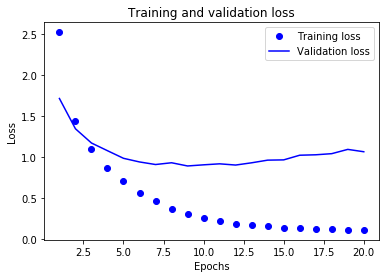

In [63]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

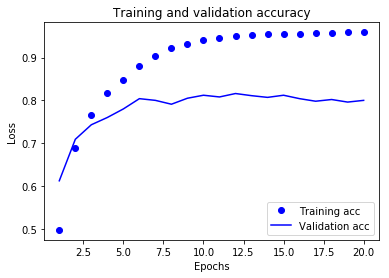

In [65]:
plt.clf()

acc = history.history['acc']
val_acc = history.history['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()